In [1]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from coffea import hist, processor 
from coffea.hist import plot
from coffea.util import load, save

In [14]:
year='2018'
hists = load('../hists/darkhiggs'+year+'.scaled')

data={
    '2016':{
        'sr': 'MET',
        'wmcr': 'MET',
        'tmcr': 'MET',
        'wecr': 'SingleElectron',
        #'wecr': 'EGamma',
        'tecr': 'SingleElectron',
        #'tecr': 'EGamma',
        'zmcr': 'MET',
        'zecr': 'SingleElectron',
        #'zecr': 'EGamma',
        'gcr': 'SinglePhoton'
        #'gcr': 'EGamma'
    },
    '2017':{
        'sr': 'MET',
        'wmcr': 'MET',
        'tmcr': 'MET',
        'wecr': 'SingleElectron',
        #'wecr': 'EGamma',
        'tecr': 'SingleElectron',
        #'tecr': 'EGamma',
        'zmcr': 'MET',
        'zecr': 'SingleElectron',
        #'zecr': 'EGamma',
        'gcr': 'SinglePhoton'
        #'gcr': 'EGamma'
    },
    '2018':{
        'sr': 'MET',
        'wmcr': 'MET',
        'tmcr': 'MET',
        'wecr': 'EGamma',
        'tecr': 'EGamma',
        'zmcr': 'MET',
        'zecr': 'EGamma',
        'gcr': 'EGamma'
    },
}

data_hists   = hists['data']
bkg_hists    = hists['bkg']
signal_hists = hists['sig']
print(data_hists['recoil'].identifiers('process'))

mass_binning = [
    #0,
    40,
    50,
    60,
    70,
    80,
    90,
    100,
    120,
    150,
    180,
    240,
    300,
]

bkg_hists['template']=bkg_hists['template'].rebin('fjmass',hist.Bin('fjmass','Mass', mass_binning))
signal_hists['template']=signal_hists['template'].rebin('fjmass',hist.Bin('fjmass','Mass',mass_binning))
data_hists['template']=data_hists['template'].rebin('fjmass',hist.Bin('fjmass','Mass',mass_binning))

recoil_binning = [250, 310, 370, 470, 590, 3000]
#recoil_binning = [250, 310, 370, 470, 3000]
#recoil_binning = [1020, 3000]
bkg_hists['template']=bkg_hists['template'].rebin('recoil',hist.Bin('recoil','Recoil',recoil_binning))
signal_hists['template']=signal_hists['template'].rebin('recoil',hist.Bin('recoil','Recoil',recoil_binning))
data_hists['template']=data_hists['template'].rebin('recoil',hist.Bin('recoil','Recoil',recoil_binning))
    

[<StringBin (MET) instance at 0x2b2f30ba0a90>, <StringBin (EGamma) instance at 0x2b2f30ba0b70>]


In [28]:
exp = 0
tot_bkg_yld_array={():0}
region = 'tecr'

category_map = {
    0 :'fail', 
    1 :'pass', 
    None : '',
}

category=0
sys='nominal'
    
print('------------------------')
print('------------------------')
print('Category:', region, category_map[category])
#print('Recoil bins:',signal_hists['template'].axis('recoil').edges()[()].size-1,signal_hists['template'].axis('recoil').edges()[()])
#print('Mass bins:',signal_hists['template'].axis('fjmass').edges()[()].size-1,signal_hists['template'].axis('fjmass').edges()[()])
#print('Systematic:', sys)
#print('------------------------')
print('------------------------')
print('------------------------')
for p in bkg_hists['template'].identifiers('process'):
    bkg_yld_array = bkg_hists['template'].integrate('region',region).integrate('process', p).integrate('systematic',sys).sum(overflow='all').values()#(overflow='all')
    if () in bkg_yld_array:
        yld = bkg_yld_array[()][:,:,category].sum()
        tot_bkg_yld_array[()]+=bkg_yld_array[()]
        exp += yld
        print(p, '%.1f' % yld)

print('------------------------')
print('Total expected:', '%.1f' % exp)
print('------------------------')

if not (region == 'sr' and category==1):
    yld_array = data_hists['template'].integrate('region',region).integrate('process', data[year][region]).integrate('systematic',sys).sum(overflow='all').values()#(overflow='all')
    if () in yld_array:
        yld = yld_array[()][:,:,category].sum()
        print('Total observed:', '%.1f' % yld)   
print('------------------------')

if (region == 'sr' and category==1):
    for p in signal_hists['template'].identifiers('process'):
        sig_yld_array = signal_hists['template'].integrate('region',region).integrate('process', p).integrate('systematic',sys).sum(overflow='all').values()#(overflow='all')
        if () in sig_yld_array:
            yld = sig_yld_array[()][:,:,category].sum()
            print(p, '%.1f' % yld)
            #print(p,'S/B %.3f' % (yld/exp))
            print(p,'Significance %.1f' % (yld/np.sqrt(exp)))
            binned_significance=0
            for recoil in range(0,signal_hists['template'].axis('recoil').edges()[()].size-2):
                for mass in range(0,signal_hists['template'].axis('fjmass').edges()[()].size-2):
                    pice=np.nan_to_num(sig_yld_array[()][recoil,mass,category].sum()/np.sqrt(tot_bkg_yld_array[()][recoil,mass,category].sum()))
                    binned_significance=binned_significance+(pice*pice)
            print(p,'Binned Sig. %.2f' % np.sqrt(binned_significance))
            print('------------------------')


------------------------
------------------------
Category: tecr fail
------------------------
------------------------
Hbb 7.5
DY+HF 17.0
DY+LF 89.4
WW 153.4
WZ 31.8
ZZ 0.0
ST 1242.8
TT 11274.2
W+HF 1592.2
W+LF 4608.2
QCD 12.6
------------------------
Total expected: 19029.1
------------------------
Total observed: 17140.0
------------------------


<Hist (process,fjmass) instance at 0x2b2f30d10e48>


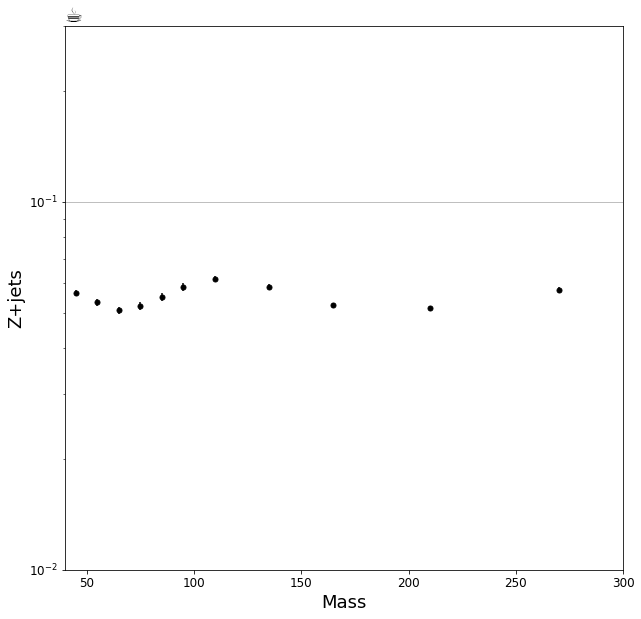

In [37]:
vjets_hists = {}
pass_hists  = {}
fail_hists  = {}


fail_binning = [0,0.65]
pass_binning = [0.65,1]
vjets_hists['template']=bkg_hists['template']

process = hist.Cat("process", "Process", sorting='placement')
cats = ("process",)
sig_map = OrderedDict()
vjets_map = OrderedDict()
#vjets_map["DY+jets"] = ("DY+*",)
vjets_map["W+jets"] = ("W+*",)
vjets_map["Z+jets"] = ("Z+*",)
#vjets_map["G+jets"] = ("G+*",)
for key in vjets_hists.keys():
    vjets_hists[key]=vjets_hists[key].group(cats, process, vjets_map)
    
pass_hists['template']=vjets_hists['template'].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD',pass_binning))
fail_hists['template']=vjets_hists['template'].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD',fail_binning))

#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6 : colors
from cycler import cycler
if not os.path.exists('unstack'):
    os.makedirs('unstack')
    
R = {}
R['sr'] = 'Signal Region'
R['wmcr'] = 'Single Muon W CR'
R['tmcr'] = 'Single Muon Top CR'
R['wecr'] = 'Single Electron W CR'
R['tecr'] = 'Single Electron Top CR'
R['zecr'] = 'Double Electron Z CR'
R['zmcr'] = 'Double Muon Z CR'
R['gcr'] = 'Single Photon CR'

process = 'Z+jets'

for key in vjets_hists.keys():
    if 'template' !=key: continue
    plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
    fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
    error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
    nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
    data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}
    colors = ['#a6cee3', '#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    fig.subplots_adjust(hspace=.07)
    ax.set_prop_cycle(cycler(color=colors))
    print(vjets_hists[key].integrate('region','sr').integrate('systematic','nominal').sum('recoil','ZHbbvsQCD'))
    #plot.plot1d(vjets_hists[key].integrate('region','sr').integrate('systematic','nominal').sum('gentype','recoil','ZHbbvsQCD'),
    plot.plotratio(pass_hists[key].integrate('region','sr').integrate('systematic','nominal').integrate('process',process).sum('recoil','ZHbbvsQCD'),
                fail_hists[key].integrate('region','sr').integrate('systematic','nominal').integrate('process',process).sum('recoil','ZHbbvsQCD'),
                ax=ax,
                #overflow='over',
                error_opts=data_err_opts,
                denom_fill_opts={},
                guide_opts={},
                unc='num'
                )
    ax.set_ylabel(process)
    ax.set_ylim(0.01,0.3)
    ax.grid(axis='y')
    ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
    args = {'linestyle':'--', 'linewidth': 5}
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    if(key=='dielemass' or key=='dimumass'): ax.set_xlim(50, 130)
    #ax.set_ylim(.1, None)
    #leg = ax.legend(ncol=2, loc='best')
    coffee = plt.text(0., 1., u"☕ ", fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    plot_path = os.path.abspath('unstack')
    plot_name = 'unstack'+key+'.png'
    #fig.savefig(os.path.join(plot_path, plot_name))


In [32]:
#To optimize cuts based on process yield, i.e. you wanna test some background rejection
exp = 0
region = 'sr'
sys = 'nominal'
variable = 'recoil'
cut_bin = 4
nbins = data_hists[variable].integrate('region').integrate('process', 'MET').values(overflow='all')[()].size
cut_value_array = data_hists[variable].integrate('region').integrate('process', 'MET').axis(variable).edges(overflow='all')

print('------------------------')
print('------------------------')
print('Category:', region)
print('Systematic:', sys)
#print('------------------------')
if cut_bin!=None: print(variable,'> %.2f' % cut_value_array[()][cut_bin+1])
#if cut_bin!=None: print(variable,'< %.2f' % cut_value_array[()][cut_bin+1])
print('------------------------')
print('------------------------')
for p in bkg_hists[variable].identifiers('process'):
    yld_array = bkg_hists[variable].integrate('region',region).integrate('process', p).values(overflow='all')
    if () in yld_array:
        #yld = np.cumsum(yld_array[()])[nbins-1]
        yld = yld_array[()].sum()
        if cut_bin!=None: yld = yld - np.cumsum(yld_array[()])[cut_bin]
        if year=='2016' and 'Z+' in str(p): yld=yld*3
        #if cut_bin!=None: yld = np.cumsum(yld_array[()])[cut_bin]
        exp += yld
        print(p, '%.1f' % yld)

print('------------------------')
print('Total expected:', '%.1f' % exp)
print('------------------------')

for p in signal_hists[variable].identifiers('process'):
    yld_array = signal_hists[variable].integrate('region',region).integrate('process', p).values(overflow='all')
    if () in yld_array:
        #yld = np.cumsum(yld_array[()])[nbins-1]
        yld = yld_array[()].sum()
        if cut_bin!=None: yld = yld - np.cumsum(yld_array[()])[cut_bin]
        #if cut_bin!=None: yld = np.cumsum(yld_array[()])[cut_bin]
        print(p, '%.1f' % yld)
        print(p,'S/B %.3f' % (yld/exp))
        print(p,'S/sqrt(B) %.1f' % (yld/np.sqrt(exp)))
        #print(p,'Fraction %.2f' % (yld/np.cumsum(yld_array[()])[16]))
        print('------------------------')

if not region == '':
    yld_array = data_hists[variable].integrate('region',region).integrate('process', data[year][region]).values(overflow='all')
    if () in yld_array:
        #yld = np.cumsum(yld_array[()])[nbins-1]
        yld = yld_array[()].sum()
        if cut_bin!=None: yld = yld - np.cumsum(yld_array[()])[cut_bin]
        #if cut_bin!=None: yld = np.cumsum(yld_array[()])[cut_bin]
        print('Total observed:', '%.1f' % yld)   
print('------------------------')
print()

------------------------
------------------------
Category: sr
Systematic: nominal
recoil > 370.00
------------------------
------------------------
Hbb 26.1
DY+HF 8.2
DY+LF 144.4
WW 376.8
WZ 770.3
ZZ 438.1
ST 224.0
TT 1220.3
W+HF 2018.1
W+LF 18106.7
Z+HF 4192.5
Z+LF 54478.0
QCD 102.5
------------------------
Total expected: 82105.9
------------------------
Mz2000_mhs70_Mdm1500 8193.8
Mz2000_mhs70_Mdm1500 S/B 0.100
Mz2000_mhs70_Mdm1500 S/sqrt(B) 28.6
------------------------
Mz1000_mhs70_Mdm500 6572.6
Mz1000_mhs70_Mdm500 S/B 0.080
Mz1000_mhs70_Mdm500 S/sqrt(B) 22.9
------------------------
Mz1000_mhs90_Mdm1000 8951.0
Mz1000_mhs90_Mdm1000 S/B 0.109
Mz1000_mhs90_Mdm1000 S/sqrt(B) 31.2
------------------------
Mz3000_mhs90_Mdm1000 11000.4
Mz3000_mhs90_Mdm1000 S/B 0.134
Mz3000_mhs90_Mdm1000 S/sqrt(B) 38.4
------------------------
Mz2000_mhs50_Mdm500 9568.2
Mz2000_mhs50_Mdm500 S/B 0.117
Mz2000_mhs50_Mdm500 S/sqrt(B) 33.4
------------------------
Mz1000_mhs50_Mdm500 6168.9
Mz1000_mhs50_Mdm50

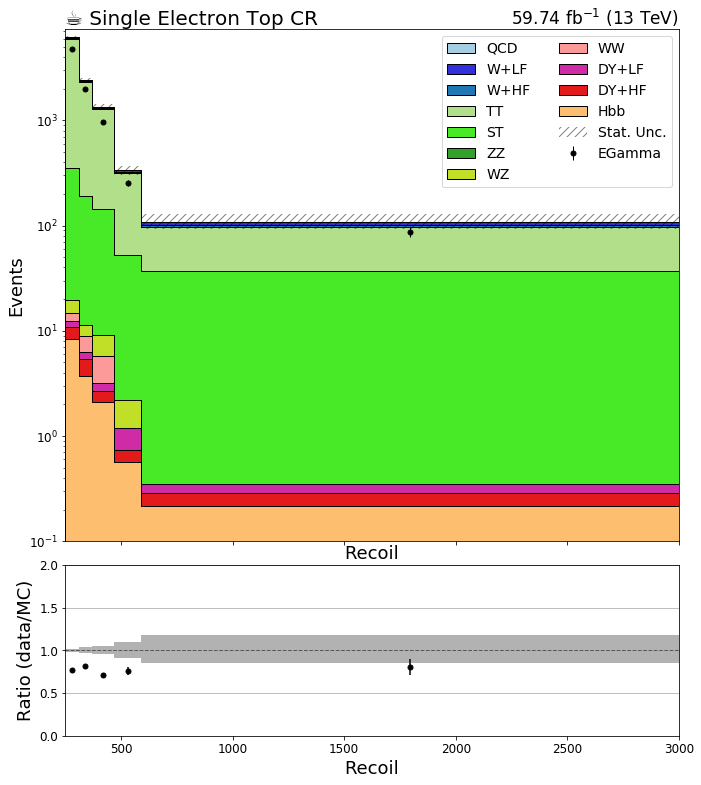

In [24]:
var='fjmass'
mass_binning = [
    #0,
    40,
    50,
    60,
    70,
    80,
    90,
    100,
    120,
    150,
    180,
    240,
    300,
]
bkg_hists['template']=bkg_hists['template'].rebin('fjmass',hist.Bin('fjmass','Mass', mass_binning))
signal_hists['template']=signal_hists['template'].rebin('fjmass',hist.Bin('fjmass','Mass',mass_binning))
data_hists['template']=data_hists['template'].rebin('fjmass',hist.Bin('fjmass','Mass',mass_binning))

recoil_binning = [250, 310, 370, 470, 590, 3000]
#recoil_binning = [250,310]
bkg_hists['template']=bkg_hists['template'].rebin('recoil',hist.Bin('recoil','Recoil',recoil_binning))
signal_hists['template']=signal_hists['template'].rebin('recoil',hist.Bin('recoil','Recoil',recoil_binning))
data_hists['template']=data_hists['template'].rebin('recoil',hist.Bin('recoil','Recoil',recoil_binning))

ZHbbvsQCD_binning = [0.65,1]
#ZHbbvsQCD_binning = [0,0.65]
bkg_hists['template']=bkg_hists['template'].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD',ZHbbvsQCD_binning))
signal_hists['template']=signal_hists['template'].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD',ZHbbvsQCD_binning))
data_hists['template']=data_hists['template'].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD',ZHbbvsQCD_binning))


#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6 : colors
from cycler import cycler
if not os.path.exists('unstack'):
    os.makedirs('unstack')
    
R = {}
R['sr'] = 'Signal Region'
R['wmcr'] = 'Single Muon W CR'
R['tmcr'] = 'Single Muon Top CR'
R['wecr'] = 'Single Electron W CR'
R['tecr'] = 'Single Electron Top CR'
R['zecr'] = 'Double Electron Z CR'
R['zmcr'] = 'Double Muon Z CR'
R['gcr'] = 'Single Photon CR'

for key in bkg_hists.keys():
    
    if key!='template': continue
    
    #if key!='fjmass': continue
    for j in bkg_hists[key].identifiers('region'):
        if not (str(j) == 'tecr'): continue
        plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
        fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
        error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
        nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
        data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}
        #colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
        colors = ['#a6cee3', '#3130db', '#1f78b4', '#b2df8a', '#48e926', '#33a02c', '#c0df26',
                  '#fb9a99', '#d02ba7', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#c64bc4',
                  '#6a3d9a', '#a9ce26', '#ffff99', '#b15928', '#edcc43']


        fig, (ax, rax) = plt.subplots(2, 1, figsize=(11,13), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
        fig.subplots_adjust(hspace=.07)
        ax.set_prop_cycle(cycler(color=colors))
        
       
        plot.plot1d(data_hists[key].integrate('region',j).integrate('systematic','nominal').sum('gentype',var,'ZHbbvsQCD')[data[year][str(j)]],            
                overlay="process",
                ax=ax,
                clear=False,
                error_opts=data_err_opts
                   )

        plot.plot1d(bkg_hists[key].integrate('region',j).integrate('systematic','nominal').sum('gentype',var,'ZHbbvsQCD'),
                overlay="process",
                ax=ax,
                clear=False,
                stack=True,
                fill_opts=fill_opts,
                error_opts=error_opts
                   )
        
        plot.plotratio(data_hists[key].integrate('region',j).integrate('systematic','nominal').sum('gentype',var,'ZHbbvsQCD').integrate('process',data[year][str(j)]), 
                   bkg_hists[key].integrate('region',j).integrate('systematic','nominal').sum('gentype',var,'ZHbbvsQCD').sum('process'),
                   ax=rax,
                   #overflow='over',
                   error_opts=data_err_opts,
                   denom_fill_opts={},
                   guide_opts={},
                   unc='num'
                   )
        
        rax.set_ylabel('Ratio (data/MC)')
        rax.set_ylim(0.0,2.0)
        rax.grid(axis='y')
        
        ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
        args = {'linestyle':'--', 'linewidth': 5}
        ax.autoscale(axis='x', tight=True)
        ax.set_yscale('log')
        if(key=='dilepmass'): ax.set_xlim(50, 130)
        ax.set_ylim(.1, None)
        leg = ax.legend(ncol=2, loc='best')
        
        coffee = plt.text(0., 1., u"☕ "+R[str(j).split('_')[0]], fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
        lumi = plt.text(1., 1., r"59.74 fb$^{-1}$ (13 TeV)", fontsize=17, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
        os.system('mkdir -p ../plots/darkhiggs'+year+'/'+str(j)+'/')
        plot_path = os.path.abspath('../plots/darkhiggs'+year+'/'+str(j)+'/') 
        plot_name = 'stack_'+key+'.png'
        fig.savefig(os.path.join(plot_path, plot_name))

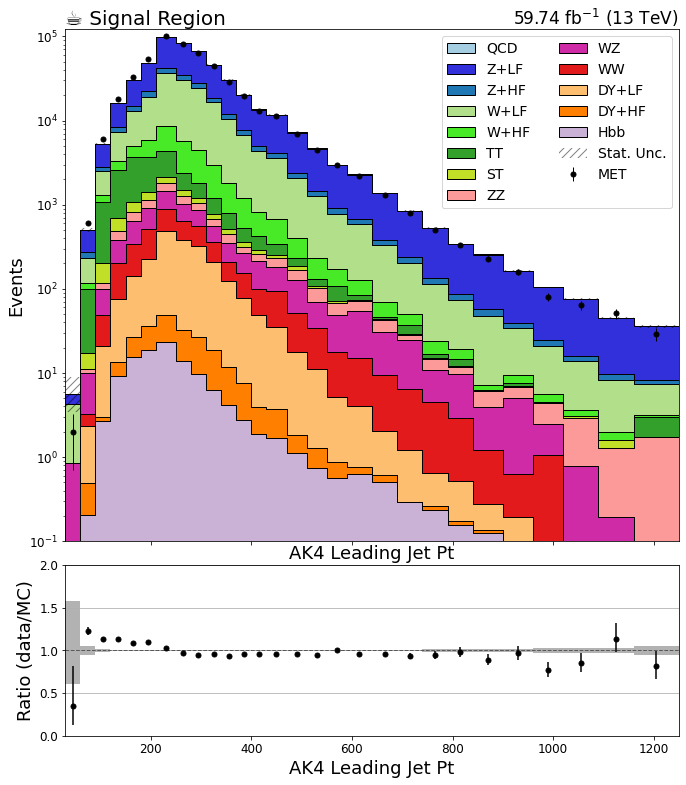

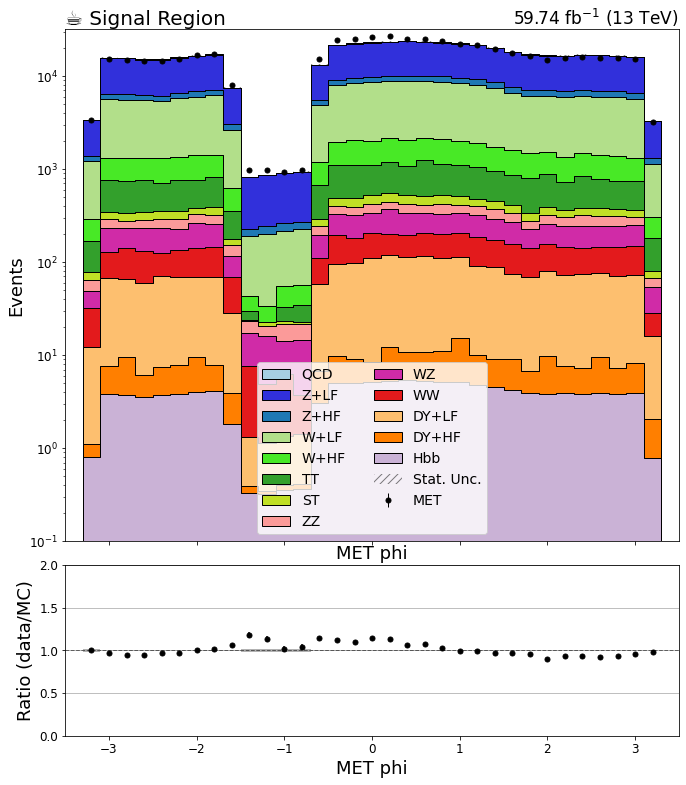

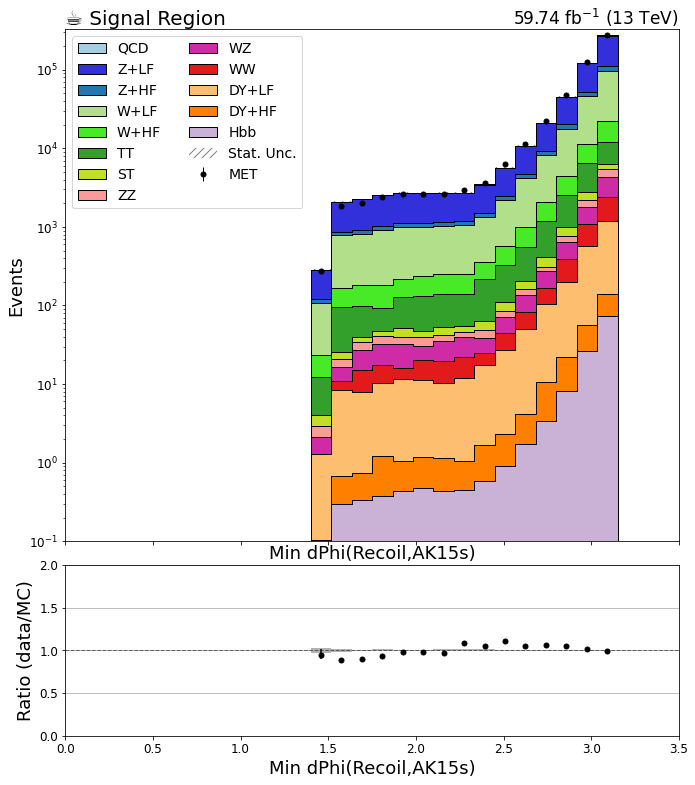

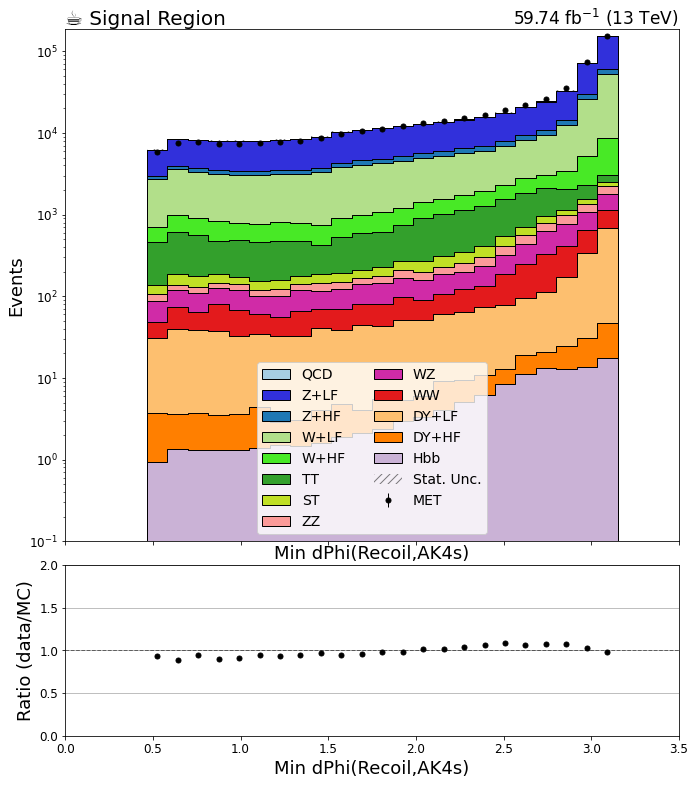

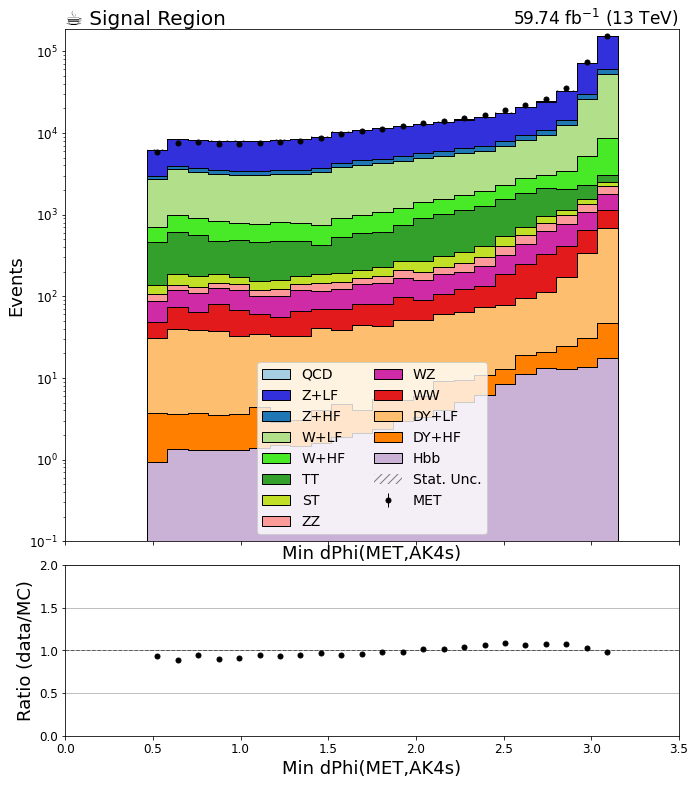

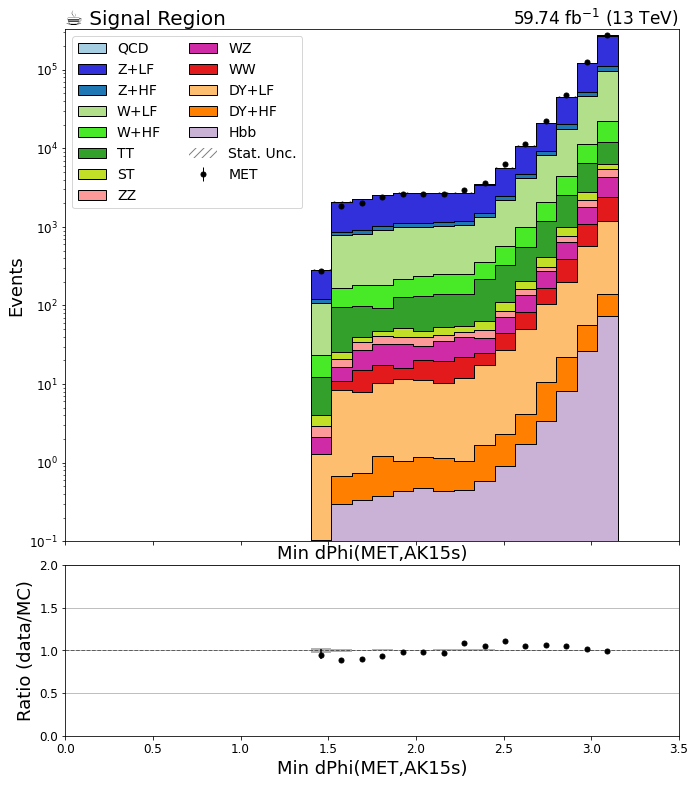

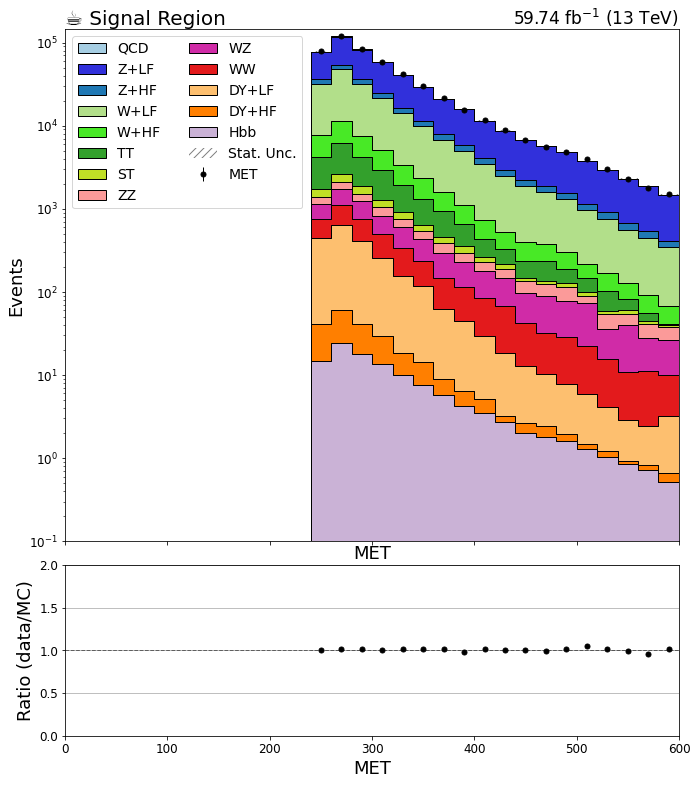

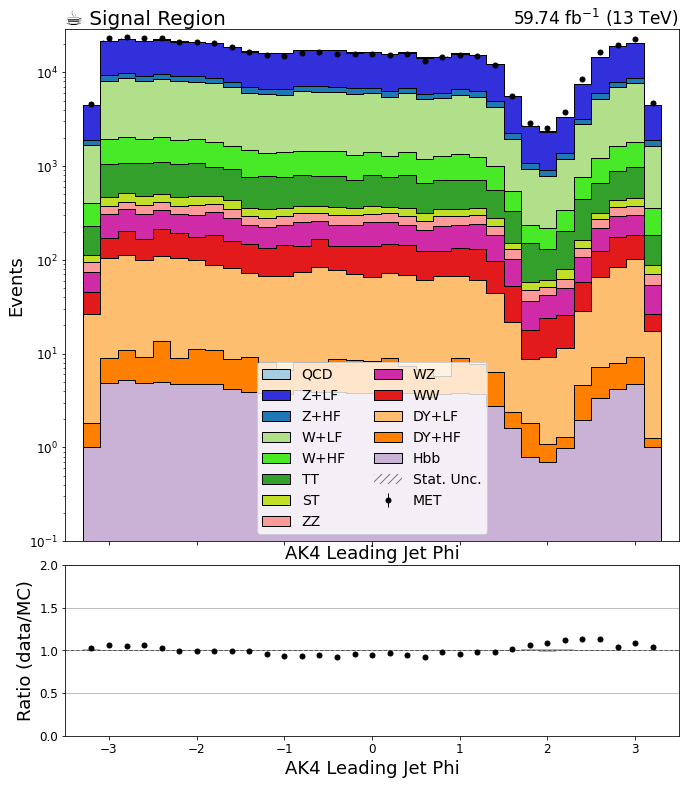

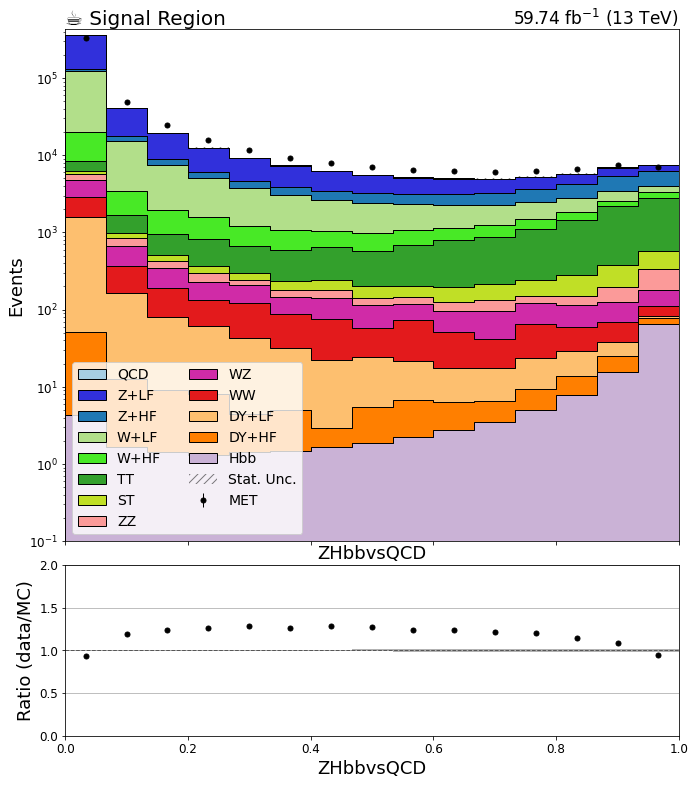

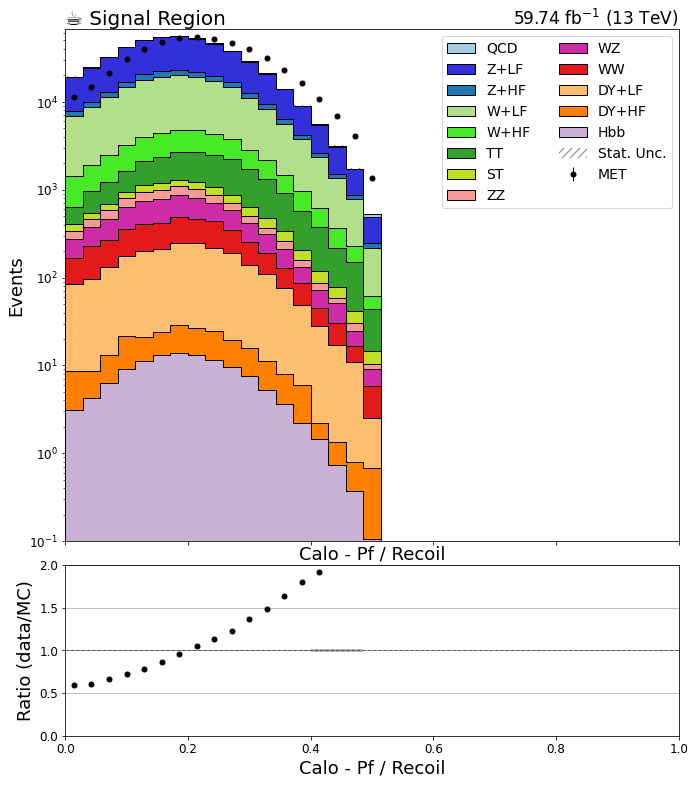

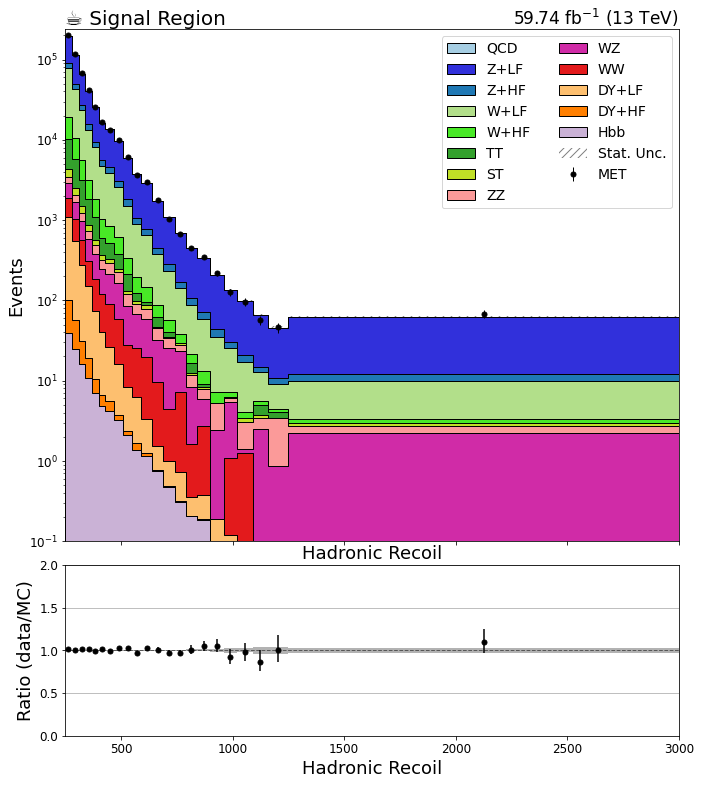

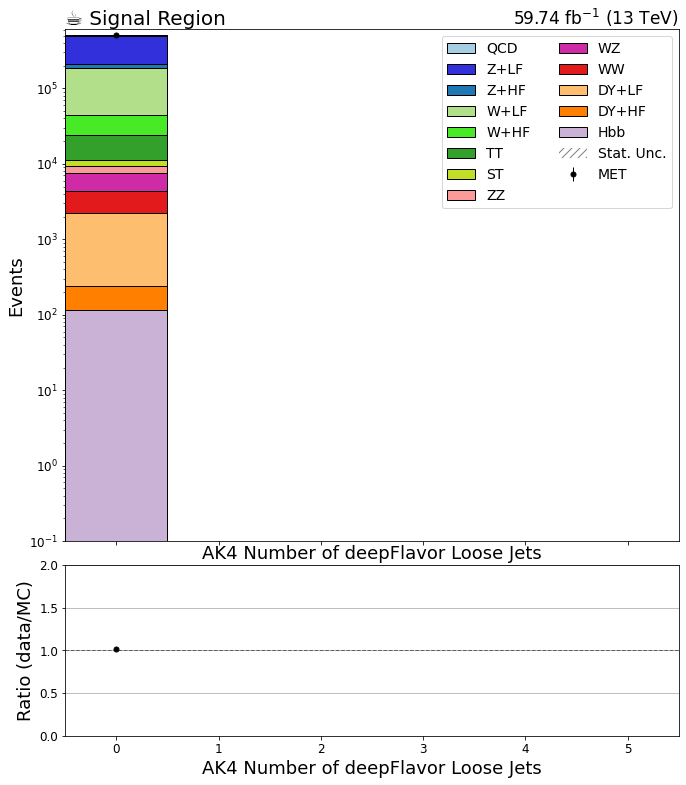

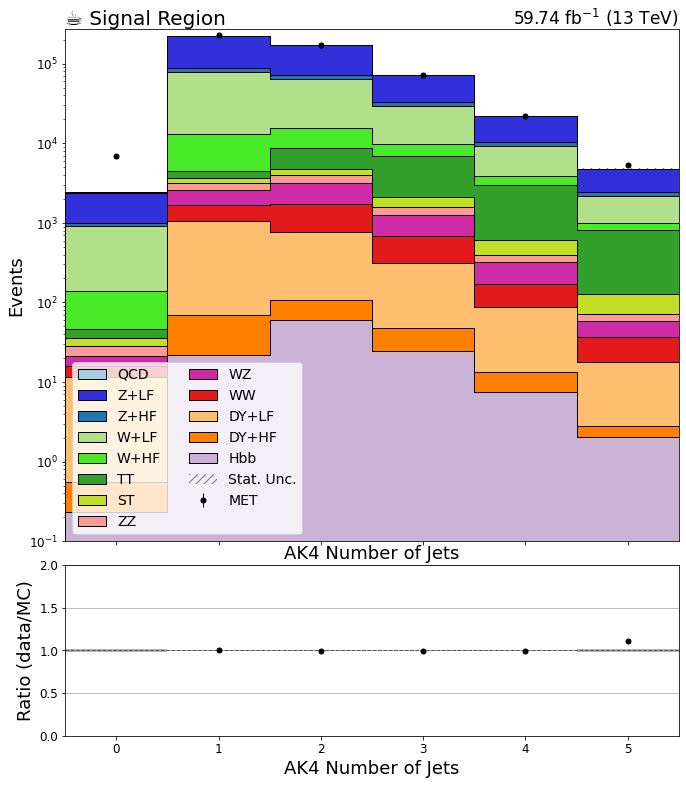

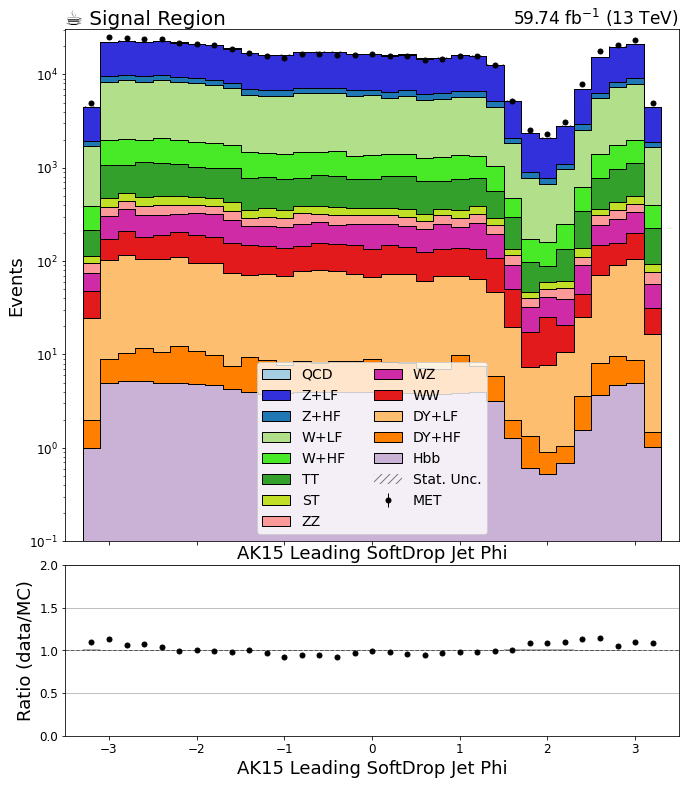

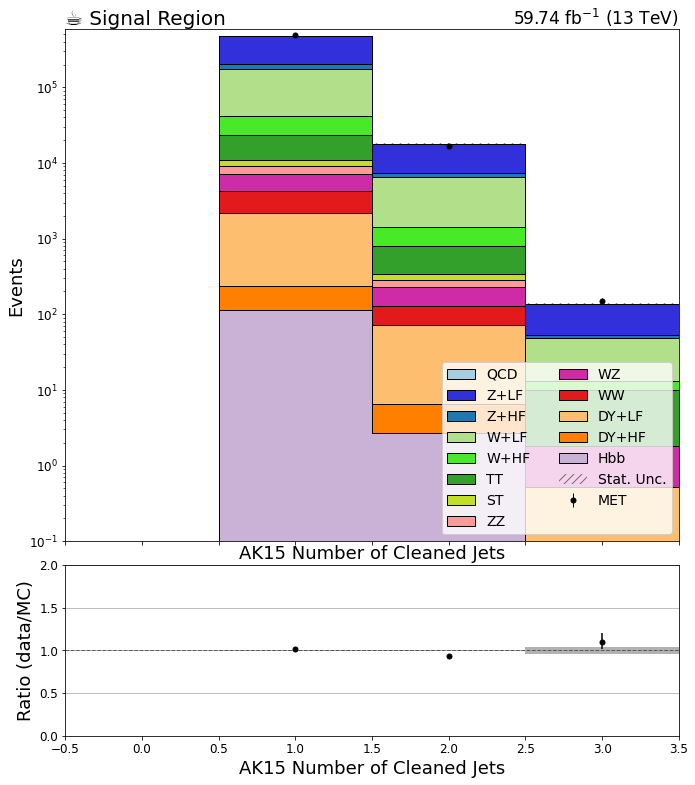

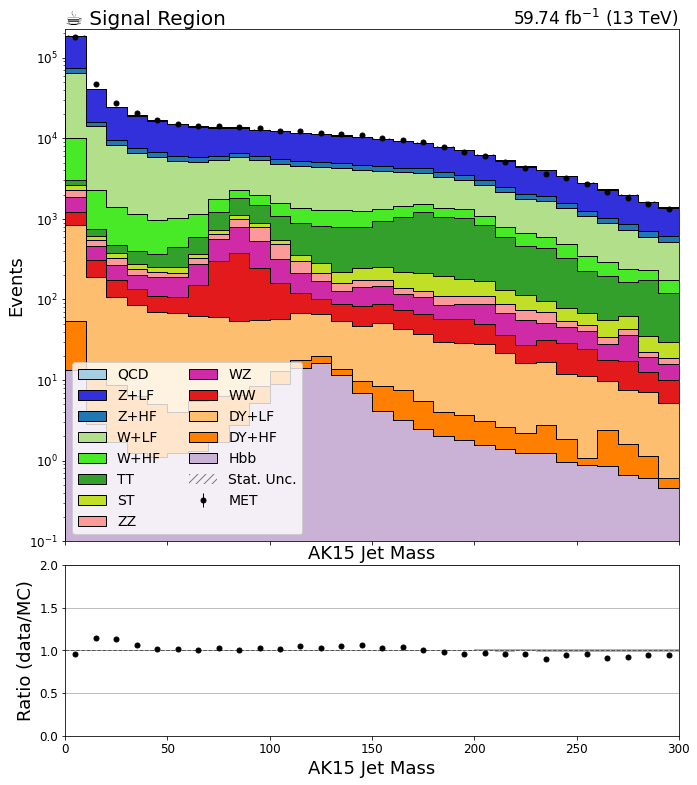

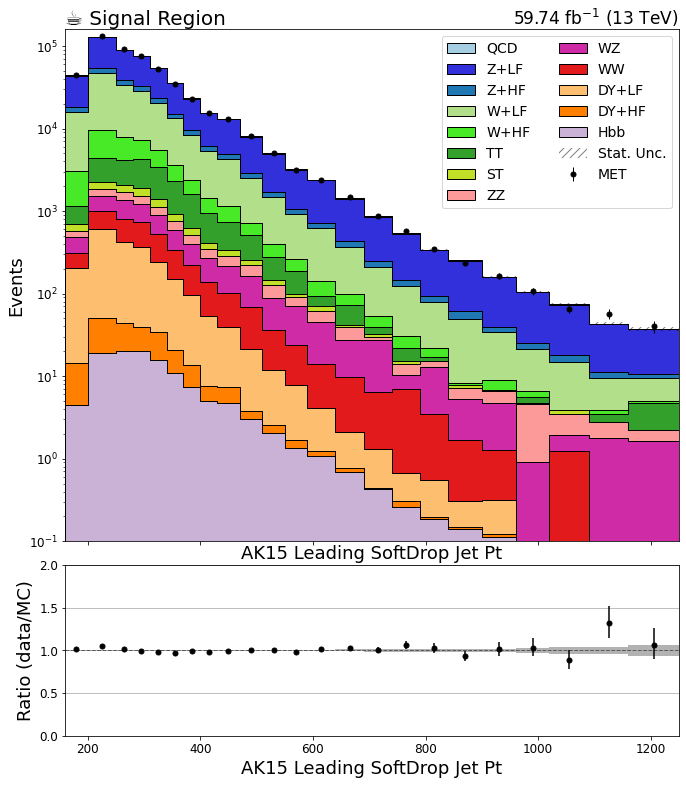

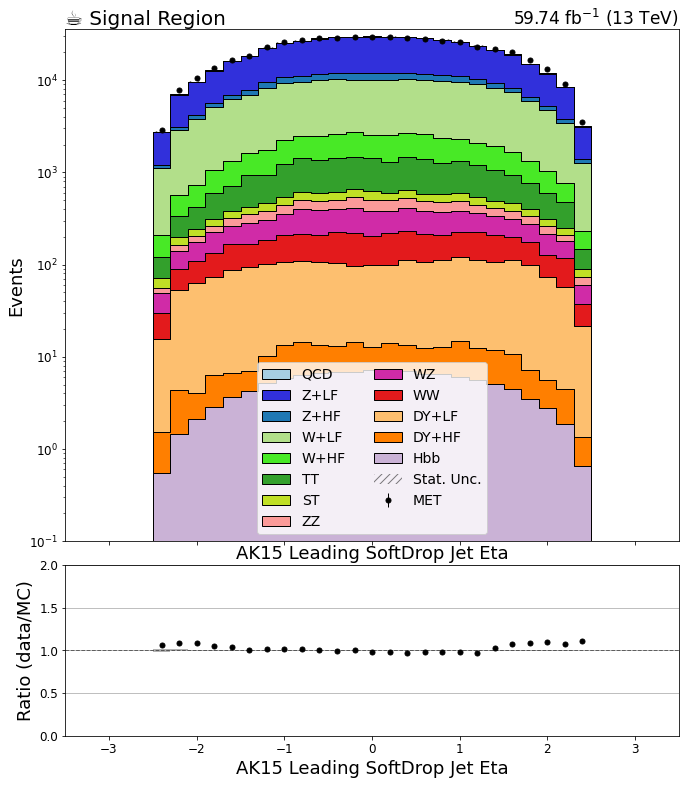

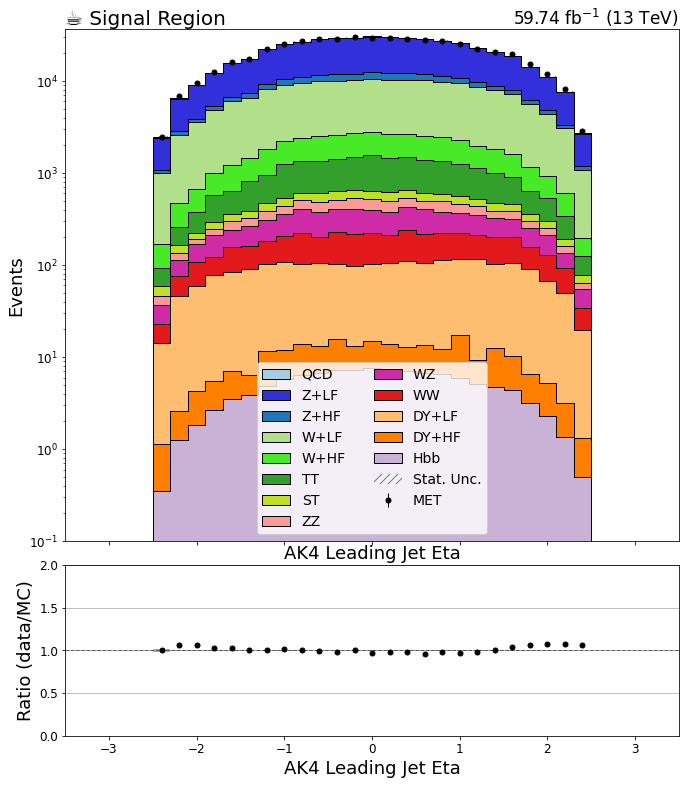

In [39]:
#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6 : colors
from cycler import cycler

region = 'sr'
sys = 'nominal'



if not os.path.exists('../plots'):
    os.makedirs('../plots')
R = {}
R['sr'] = 'Signal Region'
R['wmcr'] = 'Single Muon W CR'
R['tmcr'] = 'Single Muon Top CR'
R['wecr'] = 'Single Electron W CR'
R['tecr'] = 'Single Electron Top CR'

for key in bkg_hists.keys():
    if key=='sumw': continue
    if key=='template': continue
    if key=='cutflow': continue
    #if key!='fjmass': continue
    for j in bkg_hists[key].identifiers('region'):
        if not (str(j) == region): continue
        plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
        fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
        error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
        nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
        data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}
        #colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
        colors = ['#a6cee3', '#3130db', '#1f78b4', '#b2df8a', '#48e926', '#33a02c', '#c0df26',
                  '#fb9a99', '#d02ba7', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#c64bc4',
                  '#6a3d9a', '#a9ce26', '#ffff99', '#b15928', '#edcc43']


        fig, (ax, rax) = plt.subplots(2, 1, figsize=(11,13), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
        fig.subplots_adjust(hspace=.07)
        ax.set_prop_cycle(cycler(color=colors))
        
       
        plot.plot1d(data_hists[key].integrate('region',j)[data[year][str(j)]],            
                overlay="process",
                ax=ax,
                clear=False,
                error_opts=data_err_opts
                   )

        plot.plot1d(bkg_hists[key].integrate('region',j),
                overlay="process",
                ax=ax,
                clear=False,
                stack=True,
                fill_opts=fill_opts,
                error_opts=error_opts
                   )
        
        plot.plotratio(data_hists[key].integrate('region',j).integrate('process',data[year][str(j)]), 
                   bkg_hists[key].integrate('region',j).sum('process'),
                   ax=rax,
                   #overflow='over',
                   error_opts=data_err_opts,
                   denom_fill_opts={},
                   guide_opts={},
                   unc='num'
                   )
        
        rax.set_ylabel('Ratio (data/MC)')
        rax.set_ylim(0.0,2.0)
        rax.grid(axis='y')
        
        ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
        args = {'linestyle':'--', 'linewidth': 5}
        ax.autoscale(axis='x', tight=True)
        ax.set_yscale('log')
        if(key=='dilepmass'): ax.set_xlim(50, 130)
        ax.set_ylim(.1, None)
        leg = ax.legend(ncol=2, loc='best')
        
        coffee = plt.text(0., 1., u"☕ "+R[str(j).split('_')[0]], fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
        lumi = plt.text(1., 1., r"59.74 fb$^{-1}$ (13 TeV)", fontsize=17, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
        os.system('mkdir -p ../plots/darkhiggs'+year+'/'+str(j)+'/')
        plot_path = os.path.abspath('../plots/darkhiggs'+year+'/'+str(j)+'/') 
        plot_name = 'stack_'+key+'.png'
        fig.savefig(os.path.join(plot_path, plot_name))

In [20]:
process = hist.Cat("process", "Process", sorting='placement')
cats = ("process",)
sig_map = OrderedDict()
vjets_map = OrderedDict()
vjets_map["DY+jets"] = ("DY+*",)
vjets_map["W+jets"] = ("W+*",)
vjets_map["Z+jets"] = ("Z+*",)
vjets_map["G+jets"] = ("G+*",)
vjets_map["TT"] = ("TT*",)
vjets_hists=bkg_hists['template'].group(cats, process, vjets_map)

In [22]:
systematic = hist.Cat("systematic", "systematics", sorting='placement')
cats = ("systematic",)
btag_map = OrderedDict()
btag_map["nominal"] = ("nominal", )
btag_map["btagDown"] = ("btagDown*", )
btag_map["btagUp"] = ("btagUp*", )
ewk1_map = OrderedDict()
ewk1_map["nominal"] = ("nominal", )
ewk1_map["ew1Down"] = ("ew1Down", )
ewk1_map["ew1Up"] = ("ew1Up", )
ewk1_map["mixDown"] = ("mixDown", )
ewk1_map["mixUp"] = ("mixUp", )
ewk2_map = OrderedDict()
ewk2_map["nominal"] = ("nominal", )
ewk2_map["ew2GDown"] = ("ew2GDown", )
ewk2_map["ew2GUp"] = ("ew2GUp", )
ewk2_map["ew2WDown"] = ("ew2WDown", )
ewk2_map["ew2WUp"] = ("ew2WUp", )
ewk2_map["ew2ZDown"] = ("ew2ZDown", )
ewk2_map["ew2ZUp"] = ("ew2ZUp", )
ewk3_map = OrderedDict()
ewk3_map["nominal"] = ("nominal", )
ewk3_map["ew3GDown"] = ("ew3GDown", )
ewk3_map["ew3GUp"] = ("ew3GUp", )
ewk3_map["ew3WDown"] = ("ew3WDown", )
ewk3_map["ew3WUp"] = ("ew3WUp", )
ewk3_map["ew3ZDown"] = ("ew3ZDown", )
ewk3_map["ew3ZUp"] = ("ew3ZUp", )
qcd_map = OrderedDict()
qcd_map["nominal"] = ("nominal", )
qcd_map["qcd1Down"] = ("qcd1Down", )
qcd_map["qcd1Up"] = ("qcd1Up", )
qcd_map["qcd2Down"] = ("qcd2Down", )
qcd_map["qcd2Up"] = ("qcd2Up", )
qcd_map["qcd3Down"] = ("qcd3Down", )
qcd_map["qcd3Up"] = ("qcd3Up", )
mu_map = OrderedDict()
mu_map["nominal"] = ("nominal", )
mu_map["muFDown"] = ("muFDown", )
mu_map["muFUp"] = ("muFUp", )
mu_map["muRDown"] = ("muRDown", )
mu_map["muRUp"] = ("muRUp", )

btag_hists=vjets_hists.group(cats, systematic, btag_map)
ewk1_hists=vjets_hists.group(cats, systematic, ewk1_map)
ewk2_hists=vjets_hists.group(cats, systematic, ewk2_map)
ewk3_hists=vjets_hists.group(cats, systematic, ewk3_map)
qcd_hists=vjets_hists.group(cats, systematic, qcd_map)
mu_hists=vjets_hists.group(cats, systematic, mu_map)

[<StringBin (nominal) instance at 0x7fa2b34a6048>, <StringBin (btagDown) instance at 0x7fa2b43302b0>, <StringBin (btagUp) instance at 0x7fa2b4585240>]


Text(0.55, 0.8, 'Z/DY')

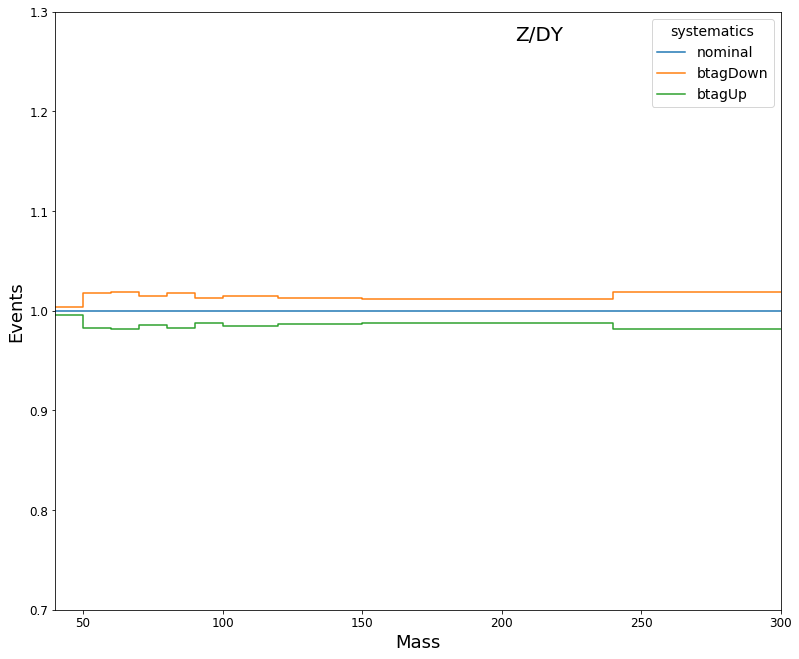

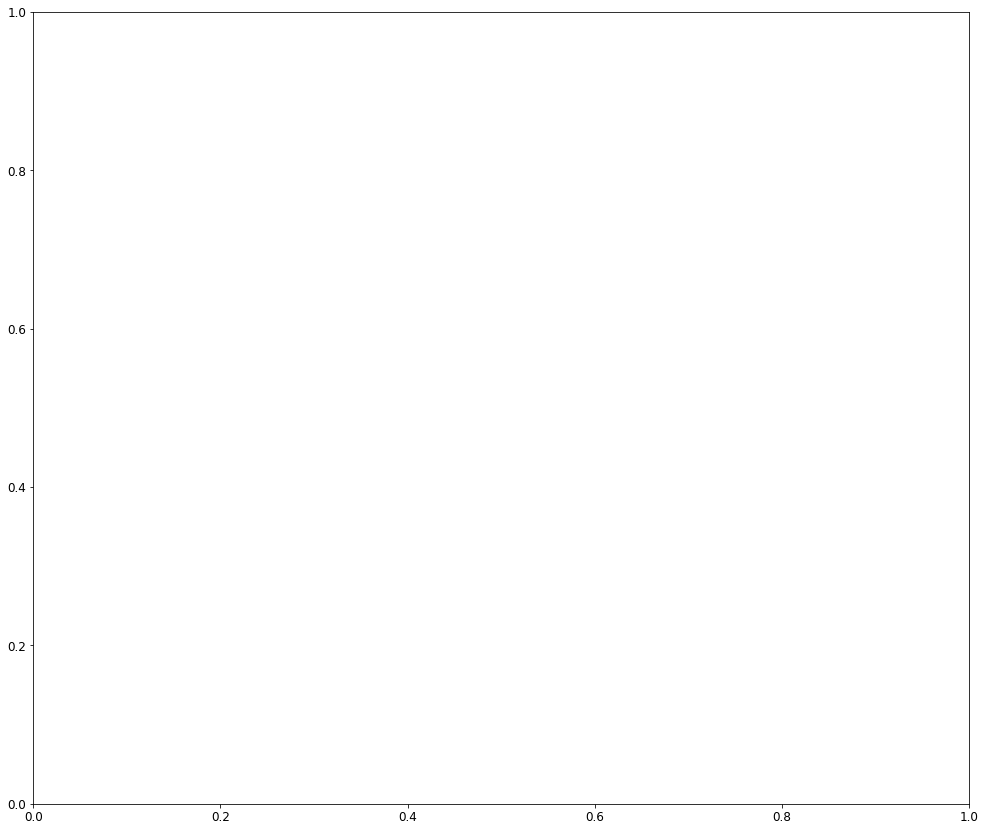

In [25]:
import matplotlib.patches as patches

syst_hists=btag_hists
print(btag_hists.integrate('region','sr').integrate('process', 'TT').identifiers('systematic'))

dy=syst_hists.integrate('region','zmcr').integrate('process', 'DY+jets').sum('gentype','recoil','ZHbbvsQCD',overflow='all')
z=syst_hists.integrate('region','sr').integrate('process', 'Z+jets').sum('gentype','recoil','ZHbbvsQCD',overflow='all')
w=syst_hists.integrate('region','sr').integrate('process', 'W+jets').sum('gentype','recoil','ZHbbvsQCD',overflow='all')
a=syst_hists.integrate('region','gcr').integrate('process', 'G+jets').sum('gentype','recoil','ZHbbvsQCD',overflow='all')
tt=syst_hists.integrate('region','sr').integrate('process', 'TT').sum('gentype','recoil','ZHbbvsQCD',overflow='all')


for syst in dy.identifiers('systematic'):
    if str(syst) == 'nominal': continue
    tt.values()[(str(syst),)]/=tt.values()[('nominal',)]
    dy.values()[(str(syst),)]/=dy.values()[('nominal',)]
    z.values()[(str(syst),)]/=z.values()[('nominal',)]
    w.values()[(str(syst),)]/=w.values()[('nominal',)]
    a.values()[(str(syst),)]/=a.values()[('nominal',)]
tt.values()[('nominal',)]/=tt.values()[('nominal',)]
dy.values()[('nominal',)]/=dy.values()[('nominal',)]
z.values()[('nominal',)]/=z.values()[('nominal',)]
w.values()[('nominal',)]/=w.values()[('nominal',)]
a.values()[('nominal',)]/=a.values()[('nominal',)]

zw=syst_hists.integrate('region','sr').integrate('process', 'Z+jets').sum('gentype','recoil','ZHbbvsQCD',overflow='all')
for syst in zw.identifiers('systematic'):
    if str(syst) == 'nominal': continue
    zw.values()[(str(syst),)]/=zw.values()[('nominal',)]
    zw.values()[(str(syst),)]/=w.values()[(str(syst),)]
    
za=syst_hists.integrate('region','sr').integrate('process', 'Z+jets').sum('gentype','recoil','ZHbbvsQCD',overflow='all')
for syst in za.identifiers('systematic'):
    if str(syst) == 'nominal': continue
    za.values()[(str(syst),)]/=za.values()[('nominal',)]
    za.values()[(str(syst),)]/=a.values()[(str(syst),)]
    
zdy=syst_hists.integrate('region','sr').integrate('process', 'Z+jets').sum('gentype','recoil','ZHbbvsQCD',overflow='all')
for syst in zdy.identifiers('systematic'):
    if str(syst) == 'nominal': continue
    zdy.values()[(str(syst),)]/=zdy.values()[('nominal',)]
    zdy.values()[(str(syst),)]/=dy.values()[(str(syst),)]

plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12, 'figure.figsize':(13,11)})
plot = hist.plot1d(tt,overlay='systematic',error_opts=None,line_opts={'linestyle':'solid'})
plot.set_ylim(0.7, 1.3)
# build a rectangle in axes coords
left, width = .0, .55
bottom, height = .25, .55
right = left + width
top = bottom + height
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plot.text(right, top, 'Z/DY',
        fontsize=20, 
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax.transAxes)